# 1. uzdevums
Izveidot divas atšķirīgas vismaz 20×20 izmēra kartes, kuras ir piemērotas Hjū spektra izgūšanai taisnām līnijām. Ieteicams abas kartes izveidot ar līnijām, kuras ir paralēlas koordināšu asīm un tā, lai pareizais apvienojums būtu 0, 90 vai 180 grādi.



In [85]:
# generate the 2 maps
import numpy as np
import matplotlib.pyplot as plt
from src.classes import HoughMap

# generate 2 maps 20x20 that have horizontal line
size = 20

map1 = np.zeros((size,size), dtype=np.uint8)
map1[3:17,3] = 1
map1[3:17,6] = 1
#overlap
map1[4,14:20] = 1
map1[16,14:20] = 1


map2 = np.zeros((size,size), dtype=np.uint8)
#overlap
map2[:6,3] = 1
map2[:6,15] = 1

map2[11,4:14] = 1
map2[15,4:14] = 1
map2[18,4:14] = 1
map2[11:18,17] = 1


### Visualize maps

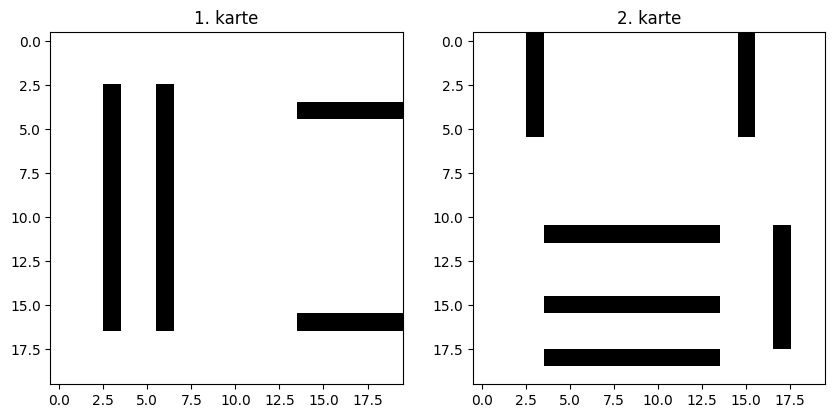

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for i, map in enumerate((map1, map2)):
    axes[i].imshow(255-map, cmap='gray')
    axes[i].set_title(f'{i+1}. karte')


plt.show()


# 2. uzdevums

Aprēķināt abām kartēm Hjū spektrus (solis ne lielāks kā 5 grādi) robežās [0–180)°.

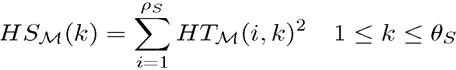

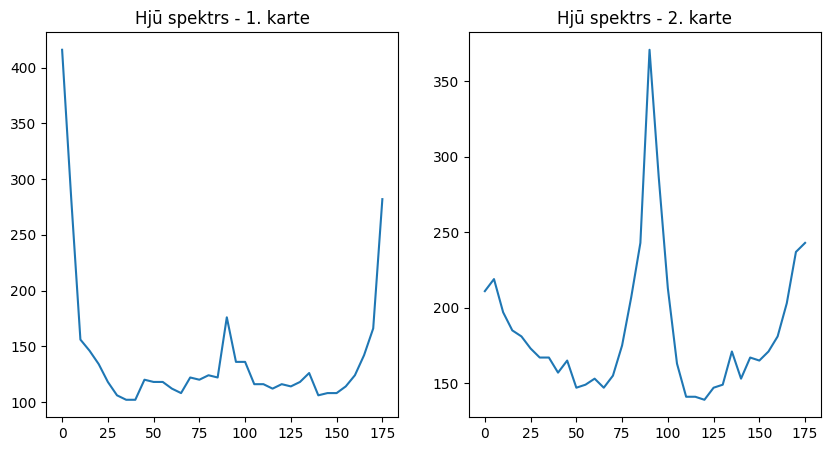

In [87]:
resolution_deg = 5
ht1, angles = HoughMap.hough_transform(map1, resolution_deg)
ht2, angles = HoughMap.hough_transform(map2, resolution_deg)

spectrum1 = HoughMap.hough_spectrum(ht1)
spectrum2 = HoughMap.hough_spectrum(ht2)


# Attēlot Hjū spektrus
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Hjū spektrs - 1. karte")
plt.plot(angles, spectrum1)
plt.subplot(1, 2, 2)
plt.title("Hjū spektrs - 2. karte")
plt.plot(angles, spectrum2)
plt.show()

## 3. uzdevums

Aprēķināt abiem Hjū spektriem cirkulāro korelāciju (solis tāds pats, kā otrajā punktā). Noteikt korelācijas maksimālo punktu/-s.

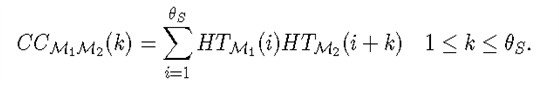

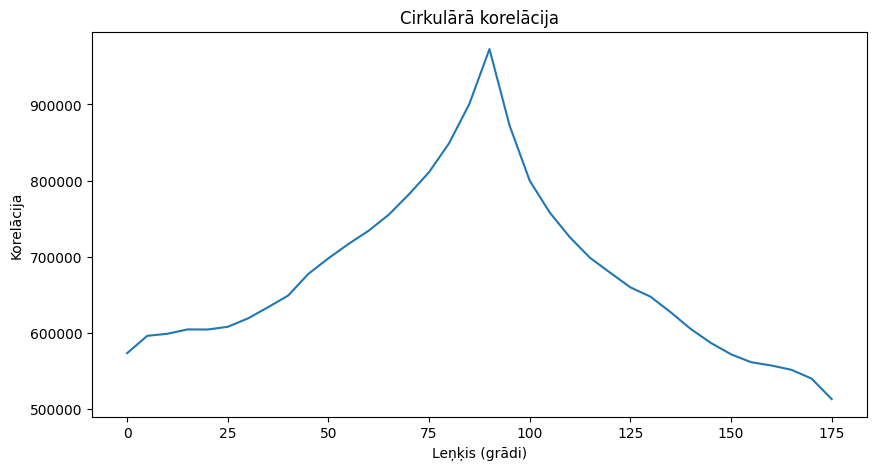

Maksimālā korelācija pie leņķa: 90°


In [88]:
#circular_correlation = HoughMap.circular_correlation(spectrum1, spectrum2)
circular_correlation = np.correlate(spectrum1, spectrum2, mode='same')
max_corr_angle = angles[np.argmax(circular_correlation) % len(angles)]

# Attēlot korelāciju
plt.figure(figsize=(10, 5))
plt.title("Cirkulārā korelācija")
plt.plot(angles, circular_correlation)
plt.xlabel("Leņķis (grādi)")
plt.ylabel("Korelācija")
plt.show()

print(f"Maksimālā korelācija pie leņķa: {max_corr_angle}°")

## 4.uzdevums

Rotēt otro karti atbilstoši iegūtajai maksimālajai korelācijai, attēlot to grafiski.

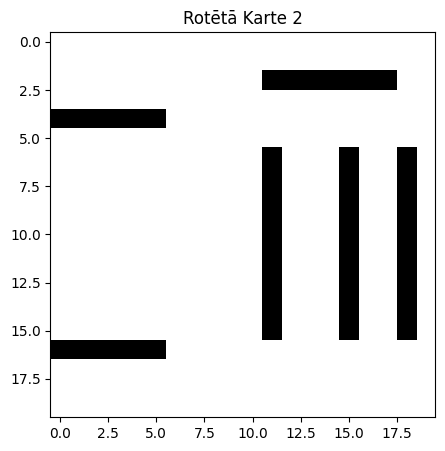

In [89]:
# assume only 90*n deg rotations
rotated_map2 = np.rot90(map2, k=int(max_corr_angle//90))

plt.figure(figsize=(10, 5))
plt.title("Rotētā Karte 2")
plt.imshow(1-rotated_map2, cmap='gray')
plt.show()

## 5. uzdevums

Aprēķināt abām kartēm X un Y spektrus (otrajai kartei aprēķināt spektrus rotētajai kartei) un karšu spektru savstarpējās korelācijas. Noteikt korelāciju maksimālos punktus.

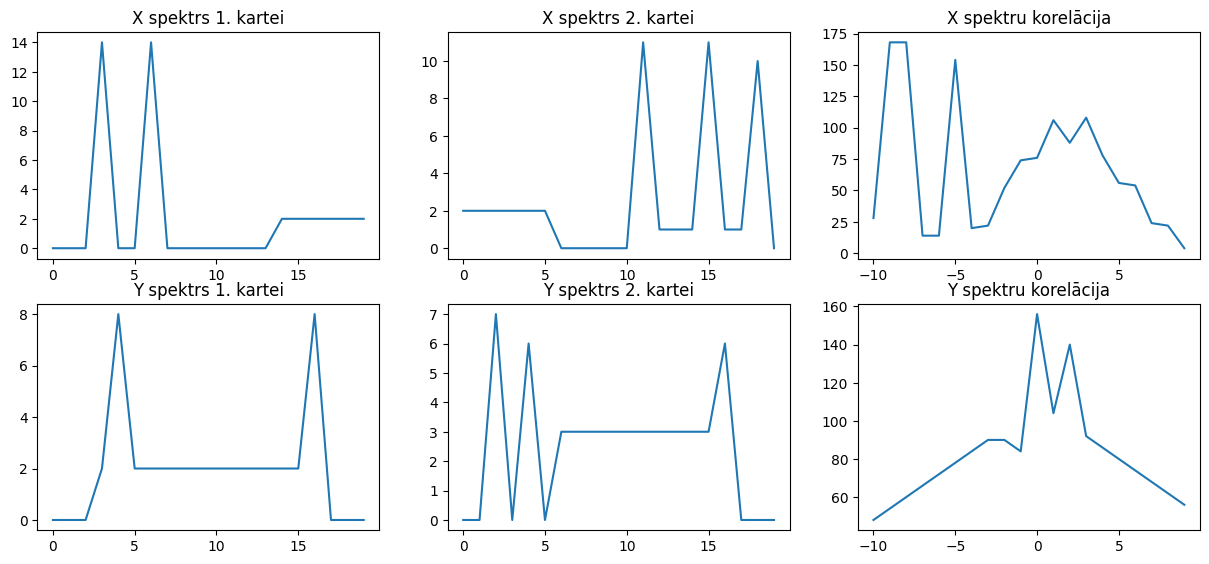

X spektra nobīde: -9
Y spektra nobīde: 0


In [90]:
x1, y1 = HoughMap.xy_spectrum(map1)
x2, y2 = HoughMap.xy_spectrum(rotated_map2)

x_corr = np.correlate(x1,x2, mode='same')
y_corr = np.correlate(y1,y2, mode='same')

x_trans = np.indices(x_corr.shape).flatten() - len(x_corr) //2
y_trans = np.indices(y_corr.shape).flatten() - len(y_corr) //2

plt.figure(figsize=(15,10))
plt.subplot(3, 3, 1)
plt.title("X spektrs 1. kartei")
plt.plot(x1)
plt.subplot(3, 3, 2)
plt.title("X spektrs 2. kartei")
plt.plot(x2)
plt.subplot(3,3,3)
plt.title("X spektru korelācija")
plt.plot(x_trans, x_corr)

plt.subplot(3, 3, 4)
plt.title("Y spektrs 1. kartei")
plt.plot(y1)
plt.subplot(3, 3, 5)
plt.title("Y spektrs 2. kartei")
plt.plot(y2)
plt.subplot(3,3,6)
plt.title("Y spektru korelācija")
plt.plot(y_trans, y_corr)

plt.show()

x_shift = np.argmax(x_corr) - len(x_corr)//2
y_shift = np.argmax(y_corr) - len(y_corr)//2

print(f"X spektra nobīde: {x_shift}")
print(f"Y spektra nobīde: {y_shift}")

## 6. uzdevums

Apvienot abas kartes, izmantojot 3. un 5. punktā aprēķināto transformāciju un attēlot iegūto karšu apvienojumu grafiski.

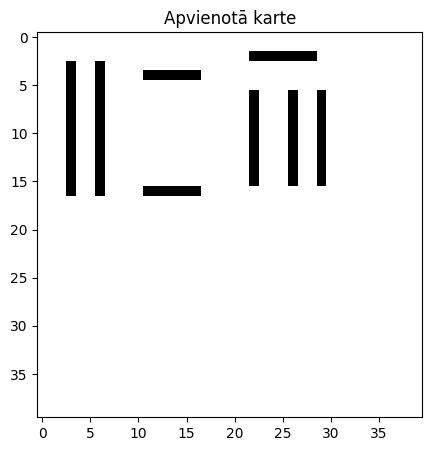

In [91]:
full_map_size = size * 2
combined_map = np.zeros((full_map_size, full_map_size))

combined_map[:size, :size] = map1
combined_map[y_shift:size+y_shift, size+x_shift:size+size+x_shift] = rotated_map2


plt.figure(figsize=(10, 5))
plt.title("Apvienotā karte")
plt.imshow(1-combined_map, cmap='gray')
plt.show()
